In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [17]:
# Load the dataset (Assuming df_tfidf_vectorized is already loaded)
df = pd.read_csv('/Users/lohithramesh/Desktop/M.S in Data Science/Semester 4/Text Mining/Project/Data/df_tfidf_vectorized.csv')
df.head()

,Label,ab,abb,abilities,ability,able,abroad,absolute,absolutely,abuse,...,youre,youth,youtube,youve,yoy,zealand,zero,zone,zones,zuckerberg
0,Negative,0.0,0.0,0.0,0.000000,0.023901,0.0,0.0,0.000000,0.046312,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,Negative,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,Positive,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,Negative,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,Negative,0.0,0.0,0.0,0.015669,0.000000,0.0,0.0,0.027076,0.191413,...,0.0,0.0,0.026004,0.0,0.0,0.121938,0.0,0.0,0.0,0.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Columns: 5001 entries, Label to zuckerberg
dtypes: float64(5000), object(1)
memory usage: 35.1+ MB


In [19]:
df.drop(columns=['Label'], inplace=True)  # Drop the Label column
df.head()

,ab,abb,abilities,ability,able,abroad,absolute,absolutely,abuse,academia,...,youre,youth,youtube,youve,yoy,zealand,zero,zone,zones,zuckerberg
0,0.0,0.0,0.0,0.000000,0.023901,0.0,0.0,0.000000,0.046312,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.015669,0.000000,0.0,0.0,0.027076,0.191413,0.0,...,0.0,0.0,0.026004,0.0,0.0,0.121938,0.0,0.0,0.0,0.0


In [4]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [5]:
df_scaled

array([[-0.07158854, -0.07783115, -0.13274215, ..., -0.10392458,
        -0.07899226, -0.13943218],
       [-0.07158854, -0.07783115, -0.13274215, ..., -0.10392458,
        -0.07899226, -0.13943218],
       [-0.07158854, -0.07783115, -0.13274215, ..., -0.10392458,
        -0.07899226, -0.13943218],
       ...,
       [-0.07158854, -0.07783115, -0.13274215, ..., -0.10392458,
        -0.07899226, -0.13943218],
       [-0.07158854, -0.07783115, -0.13274215, ..., -0.10392458,
        -0.07899226, -0.13943218],
       [-0.07158854, -0.07783115, -0.13274215, ..., -0.10392458,
        -0.07899226, -0.13943218]])

In [24]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,ab,abb,abilities,ability,able,abroad,absolute,absolutely,abuse,academia,...,youre,youth,youtube,youve,yoy,zealand,zero,zone,zones,zuckerberg
0,-0.071589,-0.077831,-0.132742,-0.360416,1.271600,-0.134089,-0.084618,-0.140249,5.463358,-0.126288,...,-0.173473,-0.162731,-0.130334,-0.081028,-0.091161,-0.099456,-0.155895,-0.103925,-0.078992,-0.139432
1,-0.071589,-0.077831,-0.132742,-0.360416,-0.331506,-0.134089,-0.084618,-0.140249,-0.085063,-0.126288,...,-0.173473,-0.162731,-0.130334,-0.081028,-0.091161,-0.099456,-0.155895,-0.103925,-0.078992,-0.139432
2,-0.071589,-0.077831,-0.132742,-0.360416,-0.331506,-0.134089,-0.084618,-0.140249,-0.085063,-0.126288,...,-0.173473,-0.162731,-0.130334,-0.081028,-0.091161,-0.099456,-0.155895,-0.103925,-0.078992,-0.139432
3,-0.071589,-0.077831,-0.132742,-0.360416,-0.331506,-0.134089,-0.084618,-0.140249,-0.085063,-0.126288,...,-0.173473,-0.162731,-0.130334,-0.081028,-0.091161,-0.099456,-0.155895,-0.103925,-0.078992,-0.139432
4,-0.071589,-0.077831,-0.132742,0.736781,-0.331506,-0.134089,-0.084618,3.596734,22.847024,-0.126288,...,-0.173473,-0.162731,3.694361,-0.081028,-0.091161,20.566435,-0.155895,-0.103925,-0.078992,-0.139432


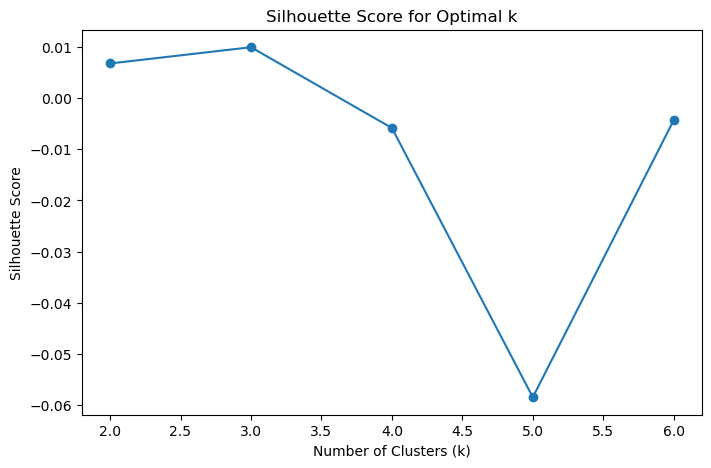

In [6]:
# Determine the optimal number of clusters using Silhouette Score
k_values = [2, 3, 4, 5, 6]
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

In [7]:
# Choose the best k (highest silhouette score)
best_k = k_values[np.argmax(silhouette_scores)]
print(f'Best k determined by silhouette analysis: {best_k}')

Best k determined by silhouette analysis: 3


#### When k=2

In [8]:
# Apply K-Means with best k
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

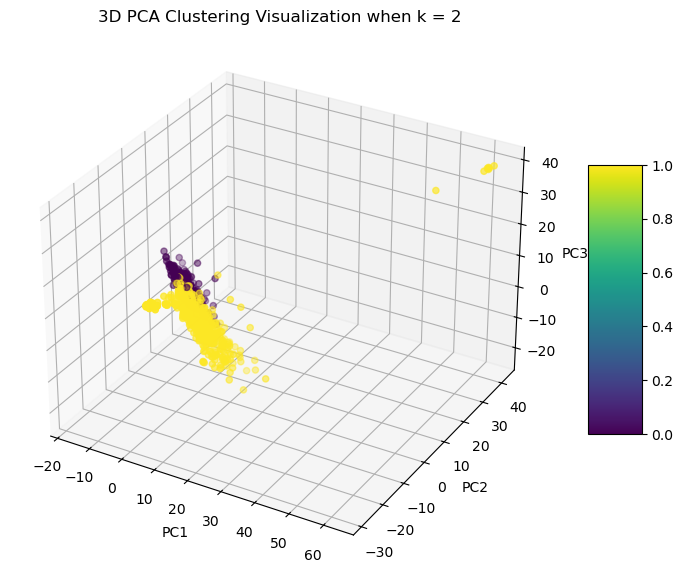

In [9]:
# Reduce dimensions using PCA for 3D visualization
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Cluster'] = df['Cluster']

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot using Matplotlib
sc = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['Cluster'], cmap='viridis')

# Labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA Clustering Visualization when k = 2')

# Add a color legend
plt.colorbar(sc, ax=ax, shrink=0.5, aspect=5)

plt.show()

#### When k = 3

In [10]:
# Apply K-Means with best k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

In [11]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca

,PC1,PC2,PC3
0,4.417980,-3.092900,-5.765674
1,4.875035,-6.541578,-0.095926
2,4.429112,-3.285034,3.280905
3,7.422719,-3.497480,-0.972745
4,6.214785,-2.442575,-6.383713
...,...,...,...
914,1.238141,-4.908177,2.721950
915,4.693490,-5.220124,-3.309932
916,9.470239,-11.077861,-7.567944
917,9.606977,-10.810973,-7.890472


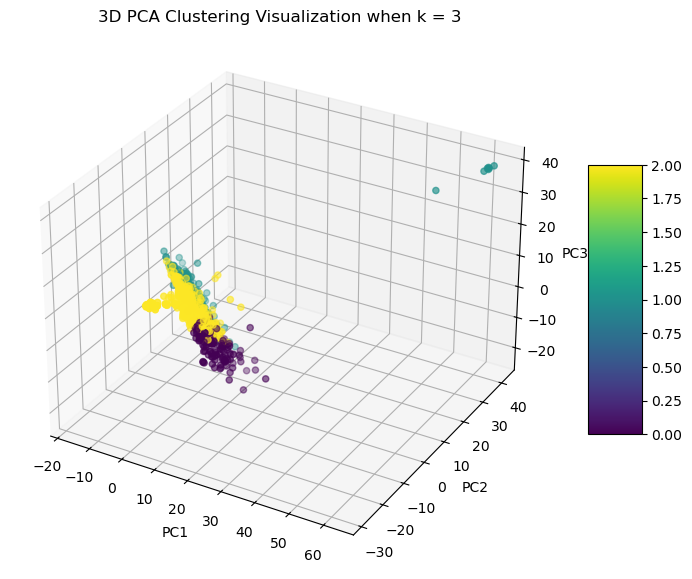

In [12]:
# Reduce dimensions using PCA for 3D visualization
df_pca['Cluster'] = df['Cluster']

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot using Matplotlib
sc = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['Cluster'], cmap='viridis')

# Labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA Clustering Visualization when k = 3')

# Add a color legend
plt.colorbar(sc, ax=ax, shrink=0.5, aspect=5)

plt.show()

#### When k = 4

In [13]:
# Apply K-Means with best k
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

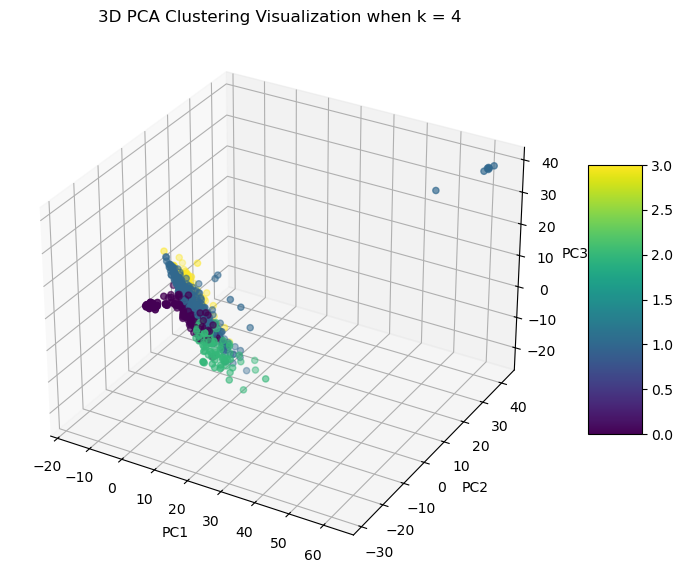

In [14]:
# Reduce dimensions using PCA for 3D visualization
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Cluster'] = df['Cluster']

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot using Matplotlib
sc = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['Cluster'], cmap='viridis')

# Labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA Clustering Visualization when k = 4')

# Add a color legend
plt.colorbar(sc, ax=ax, shrink=0.5, aspect=5)

plt.show()

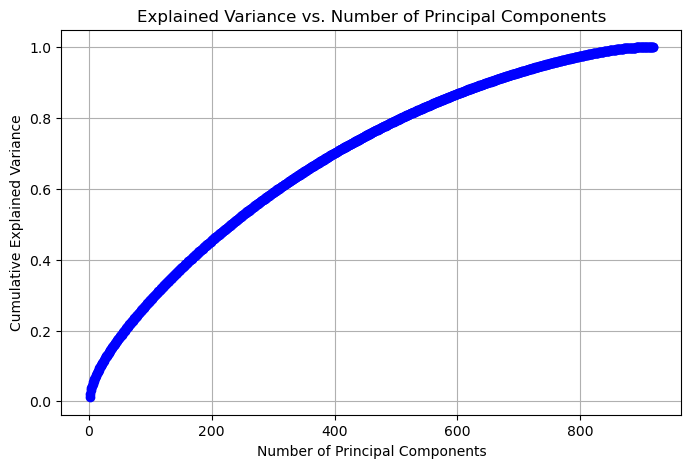

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_prepared is your preprocessed data (without labels)
pca = PCA()
X_pca = pca.fit_transform(df_scaled)

# Compute explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Compute cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')

# Labels and title
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')

# Show grid
plt.grid(True)

# Show the plot
plt.show()